# Store Transaction data ¶

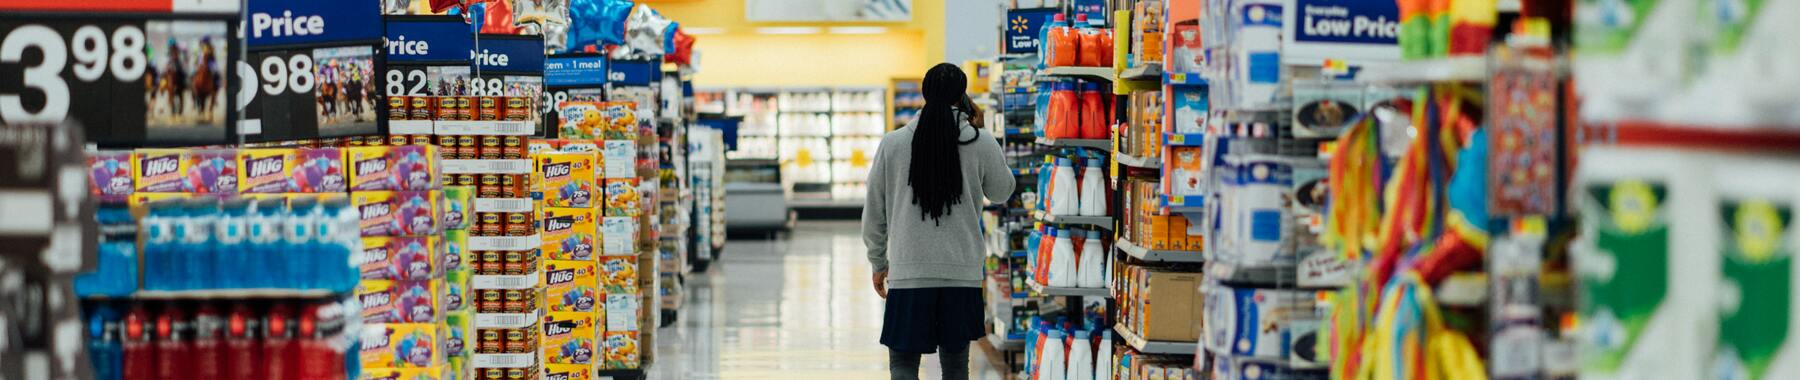

## About Dataset
Context
Nielsen receives transaction level scanning data (POS Data) from its partner stores on a regular basis. Stores sharing POS data include bigger format store types such as supermarkets, hypermarkets as well as smaller traditional trade grocery stores (Kirana stores), medical stores etc. using a POS machine.

While in a bigger format store, all items for all transactions are scanned using a POS machine, smaller and more localized shops do not have a 100% compliance rate in terms of scanning and inputting information into the POS machine for all transactions.

A transaction involving a single packet of chips or a single piece of candy may not be scanned and recorded to spare customer the inconvenience or during rush hours when the store is crowded with customers.

Thus, the data received from such stores is often incomplete and lacks complete information of all transactions completed within a day.

Additionally, apart from incomplete transaction data in a day, it is observed that certain stores do not share data for all active days. Stores share data ranging from 2 to 28 days in a month. While it is possible to impute/extrapolate data for 2 days of a month using 28 days of actual historical data, the vice versa is not recommended.

Nielsen encourages you to create a model which can help impute/extrapolate data to fill in the missing data gaps in the store level POS data currently received.

Content
You are provided with the dataset that contains store level data by brands and categories for select stores-

Hackathon_ Ideal_Data - The file contains brand level data for 10 stores for the last 3 months. This can be referred to as the ideal data.

Hackathon_Working_Data - This contains data for selected stores which are missing and/or incomplete.

Hackathon_Mapping_File - This file is provided to help understand the column names in the data set.

Hackathon_Validation_Data - This file contains the data stores and product groups for which you have to predict the Total_VALUE.

Sample Submission - This file represents what needs to be uploaded as output by candidate in the same format. The sample data is provided in the file to help understand the columns and values required.

Acknowledgements
Nielsen Holdings plc (NYSE: NLSN) is a global measurement and data analytics company that provides the most complete and trusted view available of consumers and markets worldwide. Nielsen is divided into two business units. Nielsen Global Media, the arbiter of truth for media markets, provides media and advertising industries with unbiased and reliable metrics that create a shared understanding of the industry required for markets to function. Nielsen Global Connect provides consumer packaged goods manufacturers and retailers with accurate, actionable information and insights and a complete picture of the complex and changing marketplace that companies need to innovate and grow. Our approach marries proprietary Nielsen data with other data sources to help clients around the world understand what’s happening now, what’s happening next, and how to best act on this knowledge. An S&P 500 company, Nielsen has operations in over 100 countries, covering more than 90% of the world’s population.

Know more: https://www.nielsen.com/us/en/

### Task : Analyze social media data to understand user behavior and engagement

Embark on a comprehensive analysis of social media data to gain insights into user
behavior and engagement. The project aims to understand how users interact with
content, identify patterns, and derive actionable insights for improving social media
strategies.

In [1]:
# importing the Basic packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Mapping Data
### File Name	Column Name	Column Description
### Hackathon_Ideal_Data	MONTH	Month ID (M1, M2, M3)
	STORECODE	STORE CODE (P1, P2, â€¦, P10)
	QTY	Sales Unit
	VALUE	Sales Value
	GRP	Category
	SGRP	Subcategory
	SSGRP	Sub Sub Category
	CMP	Company/Manufacturer
	MBRD	Mother Brand
	BRD	Brand
### Hackathon_Working_Data	MONTH	Month ID (M1, M2, M3)
	STORECODE	STORE CODE (N1, N2, â€¦, N10)
	DAY	Day of the month
	BILL_ID	Bill ID (T1,T2,â€¦)
	BILL_AMT	Bill Amount 
	QTY	Sales Unit
	VALUE	Sales Value
	PRICE	Selling Price Per Unit
	GRP	Category
	SGRP	Subcategory
	SSGRP	Sub Sub Category
	CMP	Company/Manufacturer
	MBRD	Mother Brand
	BRD	Brand

In [2]:
# importing the Data Set
working_data = pd.read_csv("D:\Class Back up Data Science\Store\Hackathon_Working_Data.csv")

In [3]:
working_data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [4]:
working_data.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [5]:
working_data.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [6]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [7]:
working_data.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [8]:
working_data.shape

(26985, 14)

# Exploratory Data ¶

In [9]:
subset_df = working_data[['DAY', 'VALUE']]
total_sales_per_day = subset_df.groupby('DAY')['VALUE'].sum()
total_sales_per_day

DAY
1     51290.80
2     86843.75
3     85863.94
4     91326.08
5     80210.55
6     57360.68
7     62409.71
8     73455.00
9     68747.39
10    50130.00
11    58582.25
12    71320.86
13    61023.78
14    55409.73
15    62545.55
16    40555.75
17    60183.22
18    49528.78
19    54544.78
20    48465.36
21    55987.26
22    41446.29
23    38620.15
24    43024.76
25    57944.31
26    38747.47
27    61365.15
28    61707.30
29    69859.07
30    51763.47
31    39550.56
Name: VALUE, dtype: float64

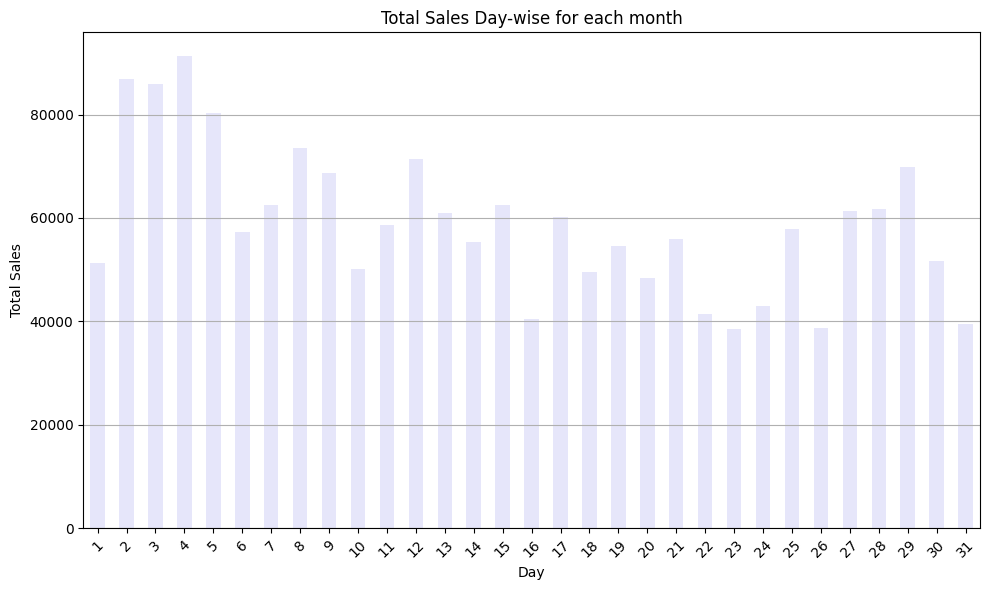

In [10]:
# Plotting total sales day-wise
plt.figure(figsize=(10, 6))
total_sales_per_day.plot(kind='bar', color='lavender')
plt.title('Total Sales Day-wise for each month')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

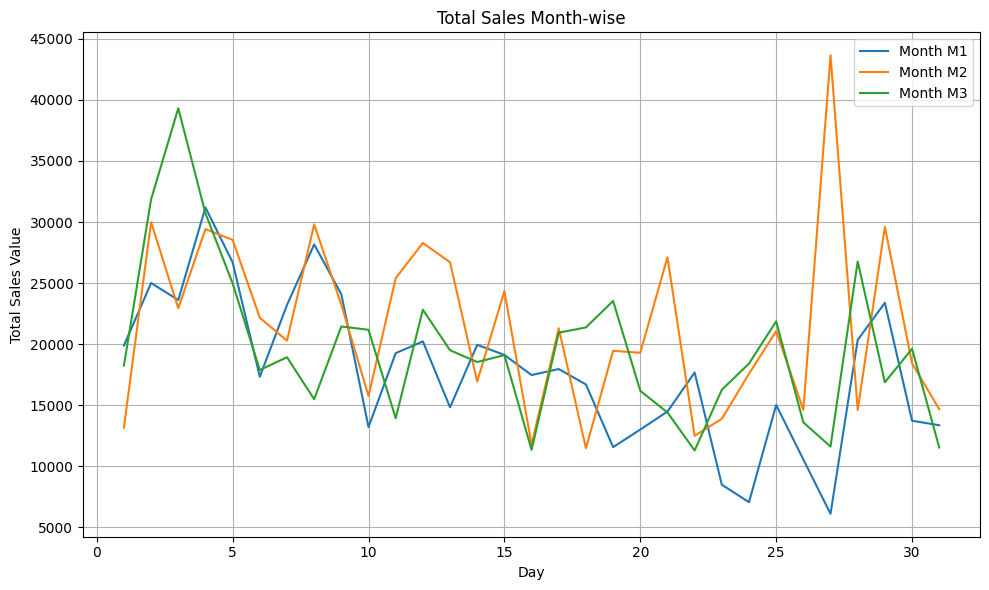

In [11]:
sales_m1 = working_data[working_data['MONTH'] == 'M1'].groupby('DAY')['VALUE'].sum()
sales_m2 = working_data[working_data['MONTH'] == 'M2'].groupby('DAY')['VALUE'].sum()
sales_m3 = working_data[working_data['MONTH'] == 'M3'].groupby('DAY')['VALUE'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_m1.index, sales_m1.values, label='Month M1')
plt.plot(sales_m2.index, sales_m2.values, label='Month M2')
plt.plot(sales_m3.index, sales_m3.values, label='Month M3')
plt.xlabel('Day')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Month-wise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


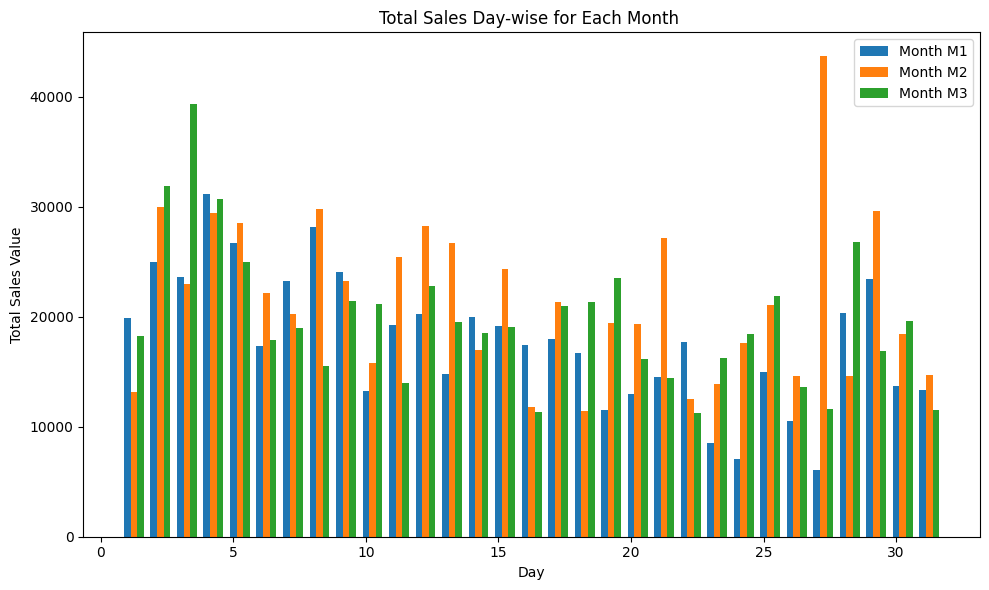

In [12]:
sales_m1 = working_data[working_data['MONTH'] == 'M1'].groupby('DAY')['VALUE'].sum()
sales_m2 = working_data[working_data['MONTH'] == 'M2'].groupby('DAY')['VALUE'].sum()
sales_m3 = working_data[working_data['MONTH'] == 'M3'].groupby('DAY')['VALUE'].sum()

plt.figure(figsize=(10, 6))
plt.bar(sales_m1.index, sales_m1.values, width=0.25, label='Month M1', align='center')
plt.bar(sales_m2.index + 0.25, sales_m2.values, width=0.25, label='Month M2', align='center')
plt.bar(sales_m3.index + 0.5, sales_m3.values, width=0.25, label='Month M3', align='center')

plt.xlabel('Day')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Day-wise for Each Month ')
plt.legend()
plt.tight_layout()
plt.show()

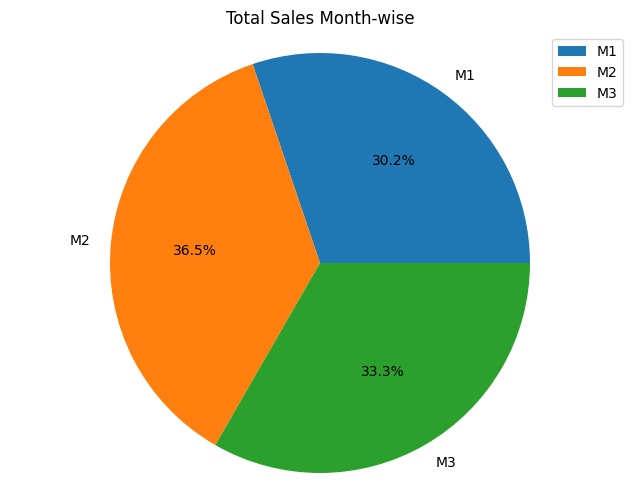

In [13]:
total_sales_monthly = working_data.groupby('MONTH')['VALUE'].sum()

plt.figure(figsize=(8, 6))
plt.pie(total_sales_monthly, labels=total_sales_monthly.index, autopct='%1.1f%%')
plt.title('Total Sales Month-wise')
plt.axis('equal') 
plt.legend()
plt.show()

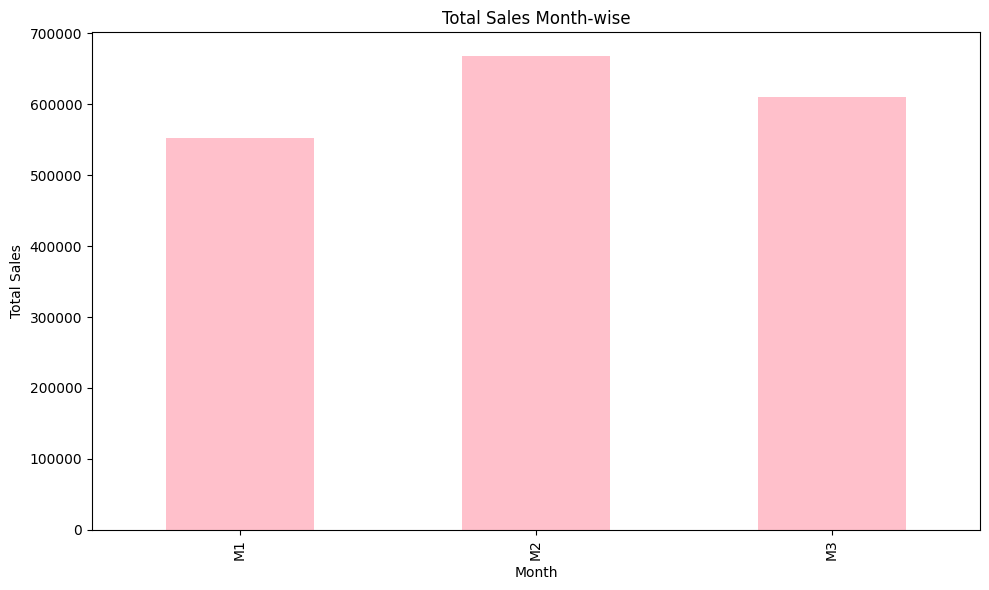

In [14]:
total_sales_monthly = working_data.groupby('MONTH')['VALUE'].sum()

total_sales_monthly.plot(kind='bar',figsize=(10, 6),color = 'pink')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Month-wise')
plt.tight_layout()
plt.show()

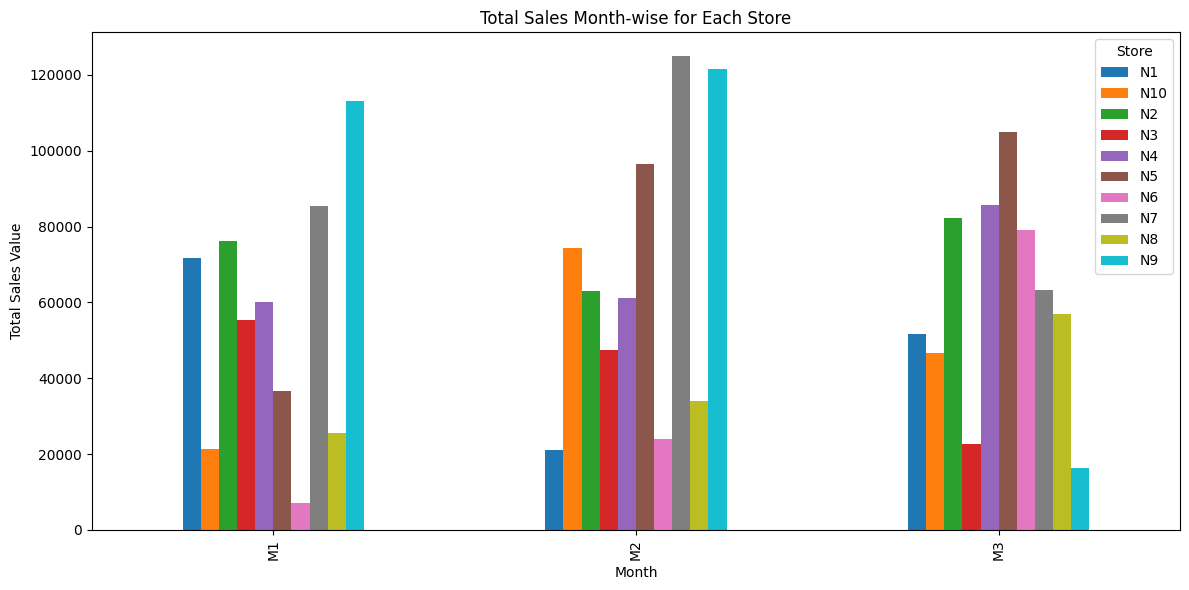

In [15]:
total_sales_month_store = working_data.groupby(['MONTH', 'STORECODE'])['VALUE'].sum().unstack()

total_sales_month_store.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Month-wise for Each Store')
plt.legend(title='Store')
plt.tight_layout()
plt.show()

In [16]:
subset_df = working_data[['STORECODE', 'VALUE']]
total_sales_per_store = subset_df.groupby('STORECODE')['VALUE'].sum()
total_sales_per_store

STORECODE
N1     144206.93
N10    142433.00
N2     221355.00
N3     125528.79
N4     206874.99
N5     238057.00
N6     110187.00
N7     273787.15
N8     116466.86
N9     250917.03
Name: VALUE, dtype: float64

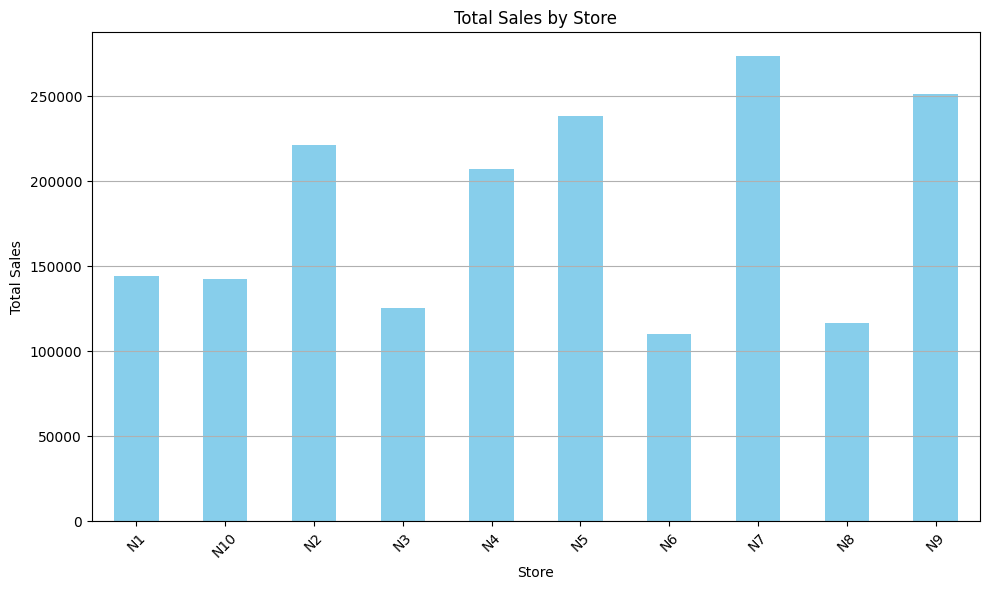

In [17]:
plt.figure(figsize=(10, 6))
total_sales_per_store.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

In [18]:
top_stores_per_month = working_data.groupby(['MONTH', 'STORECODE'])['VALUE'].sum().reset_index()
top_store_sales_per_month = top_stores_per_month.groupby('MONTH').apply(lambda x: x.nlargest(1, 'VALUE'))
top_store_sales_per_month

,,MONTH,STORECODE,VALUE
MONTH,,,,
M1,9,M1,N9,113046.01
M2,17,M2,N7,124959.94
M3,25,M3,N5,104915.00


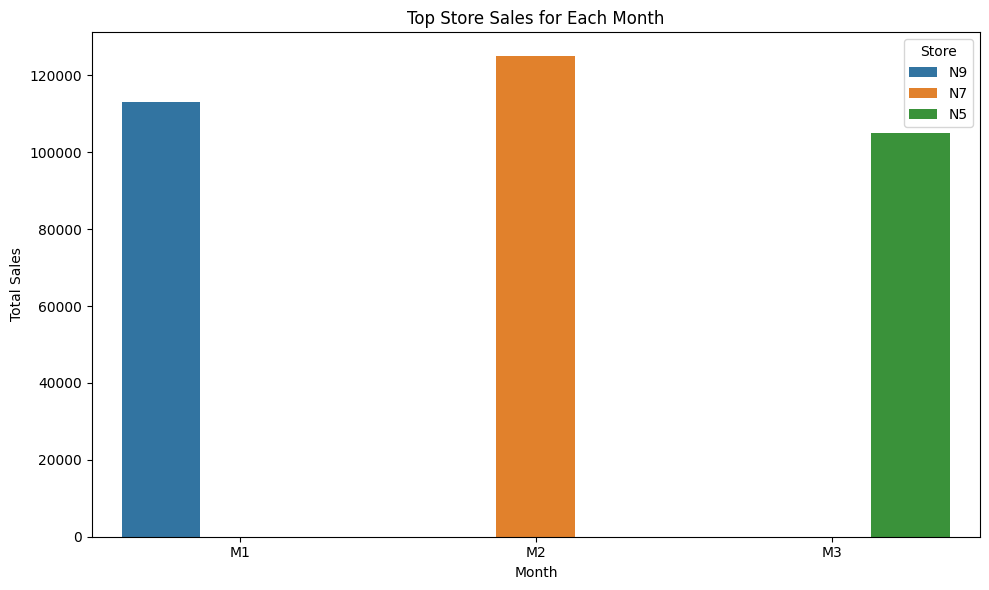

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_store_sales_per_month, x='MONTH', y='VALUE', hue='STORECODE')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Top Store Sales for Each Month')
plt.legend(title='Store')
plt.tight_layout()
plt.show()

In [20]:
top_brand_per_month = working_data.groupby(['MONTH', 'BRD'])['VALUE'].sum().reset_index()
top_brand_sales_per_month = top_brand_per_month.groupby('MONTH').apply(lambda x: x.nlargest(1, 'VALUE'))
top_brand_sales_per_month

,,MONTH,BRD,VALUE
MONTH,,,,
M1,22,M1,AMUL,36800.0
M2,926,M2,AMUL,34552.0
M3,1869,M3,AMUL,42393.0


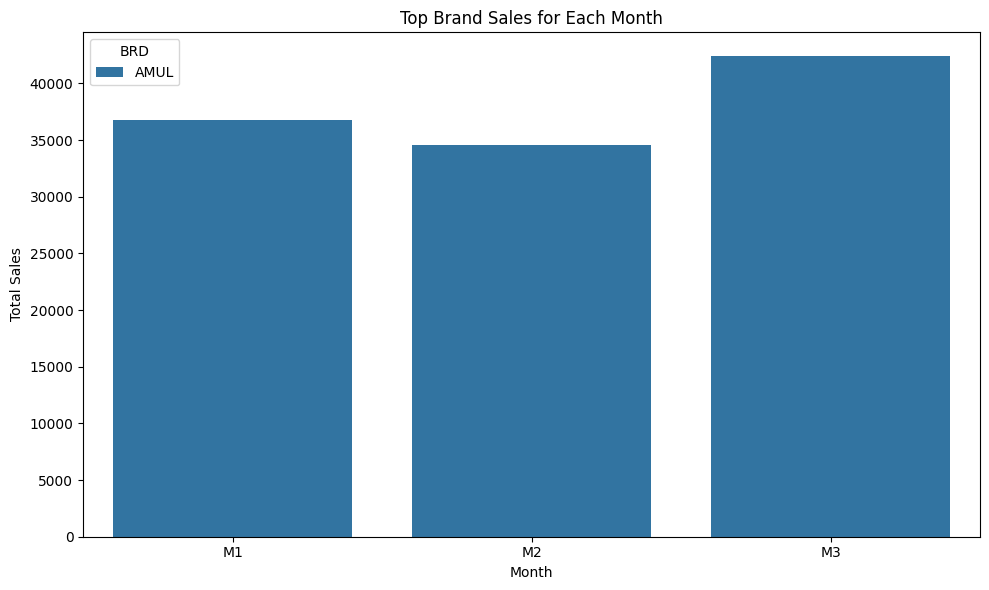

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brand_sales_per_month, x='MONTH', y='VALUE', hue='BRD')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Top Brand Sales for Each Month')
plt.tight_layout()
plt.show()

In [22]:
top_brand_per_month = working_data.groupby(['MONTH', 'BRD'])['QTY'].sum().reset_index()
top_brand_sales_per_month = top_brand_per_month.groupby('MONTH').apply(lambda x: x.nlargest(1, 'QTY'))
top_brand_sales_per_month

,,MONTH,BRD,QTY
MONTH,,,,
M1,552,M1,NAVRATNA,6005.0
M2,1701,M2,SUNDAY,12072.0
M3,2670,M3,SUNDAY,20040.0


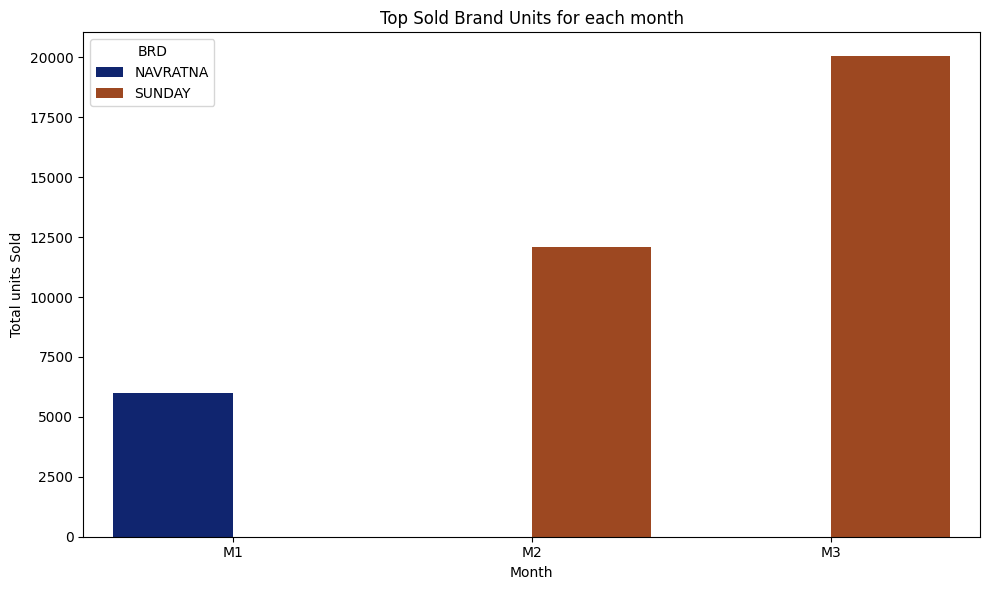

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brand_sales_per_month, x='MONTH', y='QTY', hue='BRD',palette='dark')
plt.xlabel('Month')
plt.ylabel('Total units Sold')
plt.title('Top Sold Brand Units for each month')
plt.tight_layout()
plt.show()

In [24]:
top_Company_per_month = working_data.groupby(['MONTH', 'CMP'])['VALUE'].sum().reset_index()
top_Company_sales_per_month = top_Company_per_month.groupby('MONTH').apply(lambda x: x.nlargest(1, 'VALUE'))
top_Company_sales_per_month

,,MONTH,CMP,VALUE
MONTH,,,,
M1,99,M1,HINDUSTAN UNILEVER LIMITED,79111.54
M2,364,M2,HINDUSTAN UNILEVER LIMITED,86327.75
M3,642,M3,HINDUSTAN UNILEVER LIMITED,78933.72


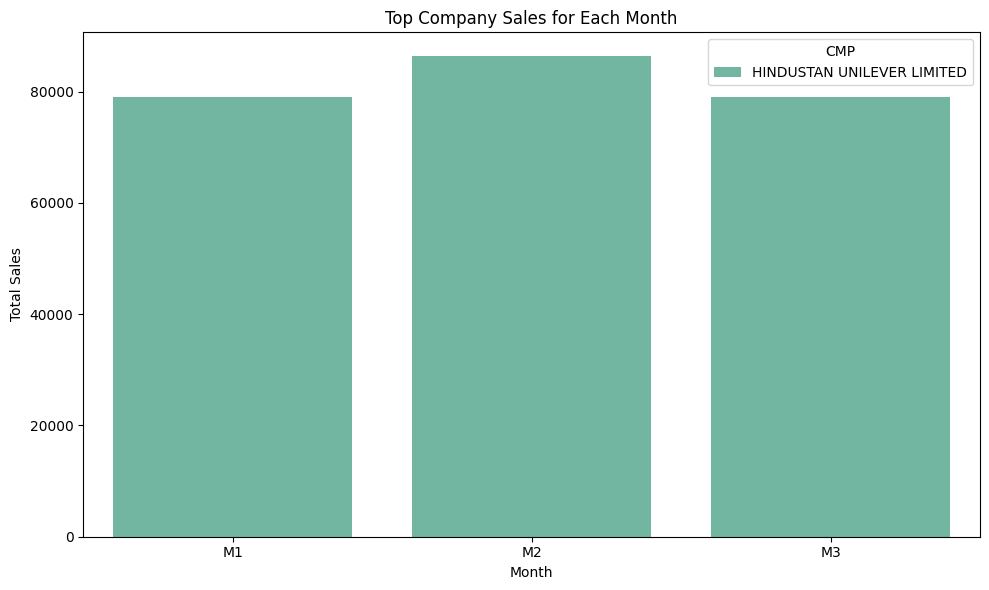

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_Company_sales_per_month, x='MONTH', y='VALUE', hue='CMP',palette='Set2')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Top Company Sales for Each Month')
plt.tight_layout()
plt.show()

In [26]:
top_Company_per_month = working_data.groupby(['MONTH', 'CMP'])['QTY'].sum().reset_index()
top_Company_sales_per_month = top_Company_per_month.groupby('MONTH').apply(lambda x: x.nlargest(1, 'QTY'))
top_Company_sales_per_month

,,MONTH,CMP,QTY
MONTH,,,,
M1,55,M1,EMAMI,6019.0
M2,404,M2,LIBERTY OIL MILLS,12074.0
M3,676,M3,LIBERTY OIL MILLS,20043.0


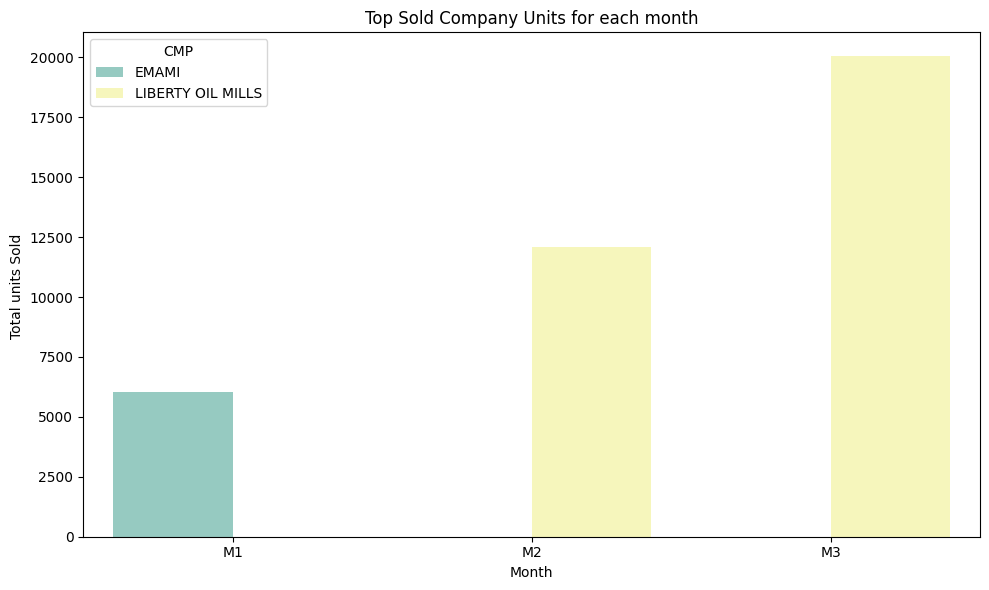

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_Company_sales_per_month, x='MONTH', y='QTY', hue='CMP',palette='Set3')
plt.xlabel('Month')
plt.ylabel('Total units Sold ')
plt.title('Top Sold Company Units for each month')
plt.tight_layout()
plt.show()

In [28]:
top_Category_per_month = working_data.groupby(['MONTH', 'GRP'])['VALUE'].sum().reset_index()
top_Category_sales_per_month = top_Category_per_month.groupby('MONTH').apply(lambda x: x.nlargest(1, 'VALUE'))
top_Category_sales_per_month

,,MONTH,GRP,VALUE
MONTH,,,,
M1,54,M1,REFINED EDIBLE OILS-ALL PACKS,55487.50
M2,132,M2,REFINED EDIBLE OILS-ALL PACKS,76049.00
M3,166,M3,BISCUITS - CORE & NON CORE,60185.73


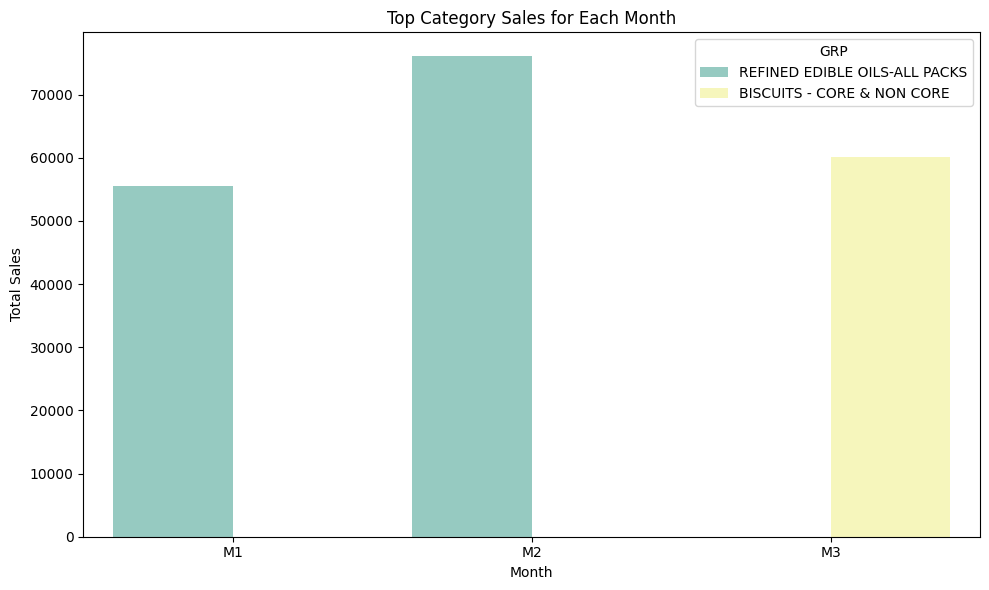

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_Category_sales_per_month, x='MONTH', y='VALUE', hue='GRP',palette='Set3')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Top Category Sales for Each Month')
plt.tight_layout()
plt.show()

In [30]:
numerical_columns = ['VALUE', 'QTY', 'PRICE']
correlation_matrix = working_data[numerical_columns].corr()
correlation_matrix

,VALUE,QTY,PRICE
VALUE,1.000000,0.067245,0.791834
QTY,0.067245,1.000000,-0.018326
PRICE,0.791834,-0.018326,1.000000


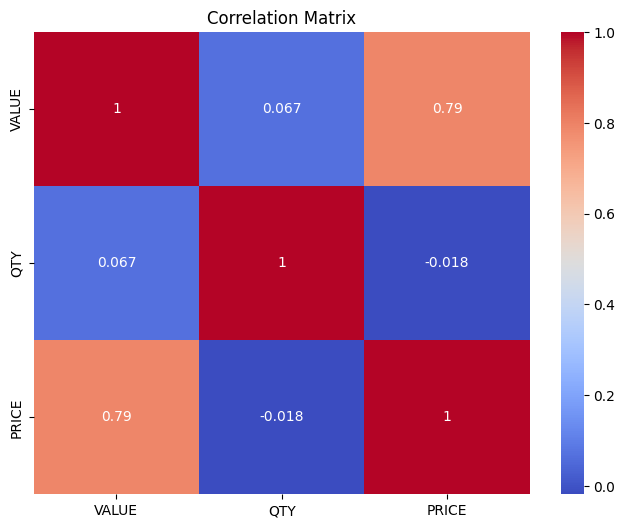

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

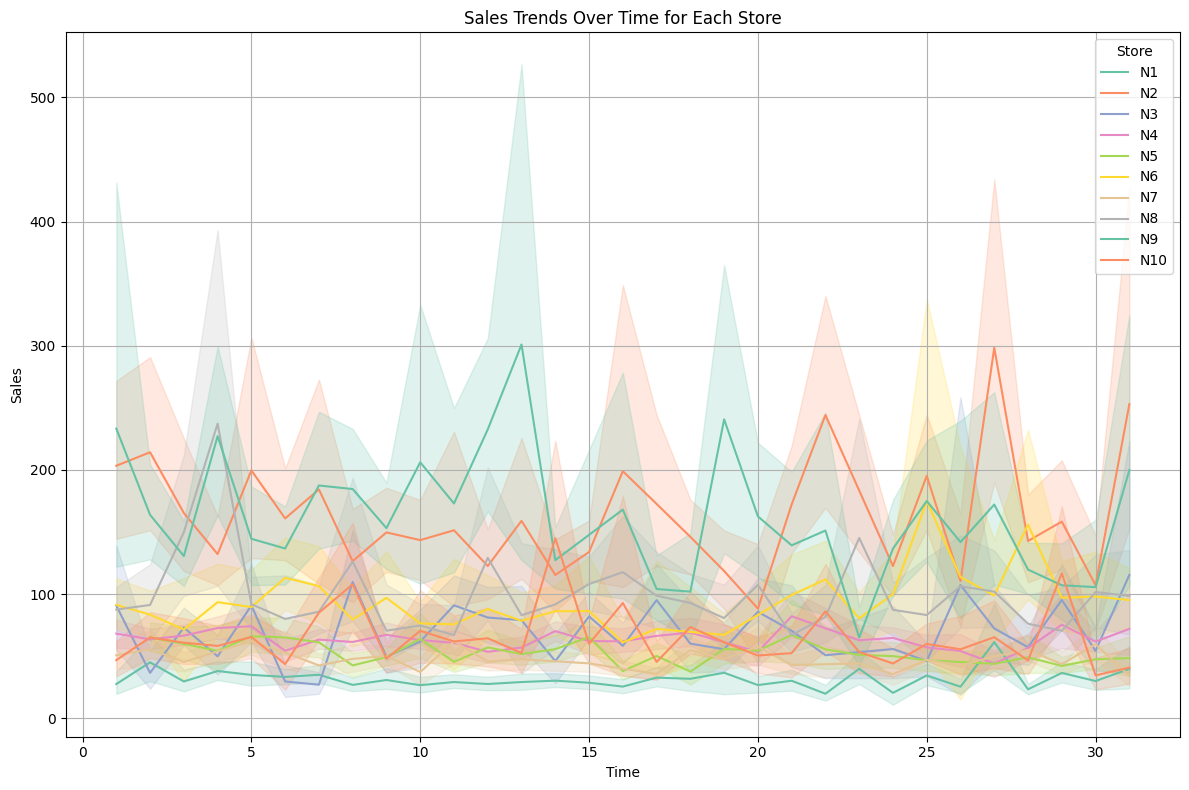

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=working_data, x='DAY', y='VALUE', hue='STORECODE', palette='Set2')
plt.title('Sales Trends Over Time for Each Store')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(title='Store')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
total_sales_subcategory = working_data.groupby('SGRP')['QTY'].sum().reset_index()
subcategories_dict = dict(zip(total_sales_subcategory['SGRP'], total_sales_subcategory['QTY']))
subcategories_dict

{'AEROSOL': 2080.0,
 'AEROSOLS': 8.0,
 'AFTER SHAVE LOTIONS': 3.0,
 'AGARBATTI': 154.0,
 'ALKALINE': 17.0,
 'ANTISEPTIC CREAMS': 7.0,
 'ANTISEPTIC LIQ': 71.0,
 'ARROWROOT': 7.0,
 'ASSORTED': 5.0,
 'ASSORTED BISCUITS': 8.0,
 'ATTA': 339.0,
 'AUTOMATIC DIFFUSER': 1.0,
 'BABY FOODS': 11.0,
 'BABY MASSAGE OILS': 5.0,
 'BAITS': 10.0,
 'BANANA CHIPS/LACHA/OTHERS': 143.0,
 'BASMATI RICE': 102.0,
 'BLEACH CREAMS': 8.0,
 'BLENDED': 1014.0,
 'BLENDED OIL': 3121.0,
 'BODY WASH': 5.0,
 'BOTTLES / TUBES': 174.0,
 'BRANDED': 292.0,
 'BROWN POWDERS': 192.0,
 'BUBBLE GUMS': 19.0,
 'BUTTER': 628.0,
 'CANVAS CLEANERS': 2.0,
 'CARDS': 16.0,
 'CEREAL BARS': 10.0,
 'CHALKS': 23.0,
 'CHEESE SPREAD': 69.0,
 'CHEWING GUMS': 84.0,
 'CHOCOLATE PANNED': 63.0,
 'CHYAVANPRASH': 5.0,
 'COATED WAFER BISC': 743.0,
 'COILS': 13.0,
 'COLD CREAMS': 3.0,
 'COMMERCIAL': 5.0,
 'CONCTN POWDERS': 200.0,
 'CONFECTIONERY - COUGH LOZENGE': 35.0,
 'CONFECTIONERY - ECLAIRS': 263.0,
 'CORN': 3.0,
 'COUNT': 480.0,
 'CREAM': 3337.0,

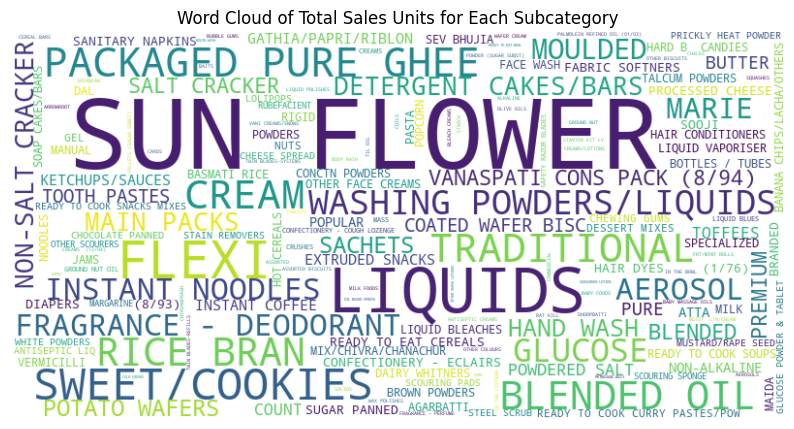

In [34]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(subcategories_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Total Sales Units for Each Subcategory')
plt.show()

In [35]:
total_sales_Category = working_data.groupby('GRP')['QTY'].sum().reset_index()
Category_dict = dict(zip(total_sales_Category['GRP'], total_sales_Category['QTY']))
Category_dict

{'AFTER SHAVE LOTIONS': 3.0,
 'AGARBATTI & DHOOPBATTI': 173.0,
 'ALL AIR FRESHNERS(01/03)': 142.0,
 'ALL IODISED SALT': 552.0,
 'ANTACIDS': 134.0,
 'ANTISEPTIC CREAMS': 2.0,
 'ANTISEPTIC LIQUIDS (4/97)': 75.0,
 'BABY FOODS': 11.0,
 'BABY OILS / MASSAGE OILS': 5.0,
 'BATTERIES': 379.0,
 'BEVERAGES': 242.0,
 'BISCUITS - CORE & NON CORE': 14138.0,
 'BLUES': 27.0,
 'BREAKFAST CEREALS': 476.0,
 'BUTTER MARGR  (4/94)': 671.0,
 'CHEESE        (4/94)': 334.0,
 'CHOCOLATE': 3343.0,
 'CHYAVANPRASH': 5.0,
 'CLEANERS - FLOOR': 326.0,
 'CLEANERS - GLASS': 29.0,
 'CLEANERS - TOILET': 8208.0,
 'CLEANERS - UTENSIL': 3432.0,
 'COCONUT OIL PKTYP (08/02)': 292.0,
 'COFFEE': 410.0,
 'CONDOMS': 5.0,
 'CONFECTIONERY - COUGH LOZENGE': 35.0,
 'CONFECTIONERY - ECLAIRS': 263.0,
 'CONFECTIONERY - LOLLIPOP/FMR': 63.0,
 'CONFECTIONERY - TOFFEE/HBC': 703.0,
 'CONFECTIONERY - TOTAL GUM': 103.0,
 'DETERGENT CAKES/BARS': 1320.0,
 'DIAPERS       (8/93)': 261.0,
 'DIGESTIVES': 8.0,
 'FRAGRANCE-PERFUM,DEO & COLOGNE': 212

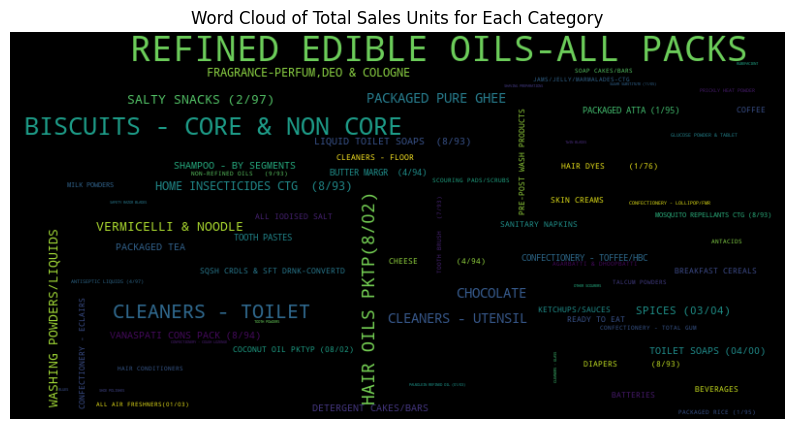

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate_from_frequencies(Category_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Total Sales Units for Each Category')
plt.show()

In [37]:
total_sales_subcategory = working_data.groupby('SGRP')['QTY'].sum().reset_index()
top_20_subcategories = total_sales_subcategory.sort_values(by='QTY', ascending=False).head(20)
top_20_subcategories

,SGRP,QTY
155,SUN FLOWER,32803.0
85,LIQUIDS,8588.0
58,FLEXI,6030.0
157,SWEET/COOKIES,3937.0
112,PACKAGED PURE GHEE,3454.0
43,CREAM,3337.0
163,TRADITIONAL,3319.0
19,BLENDED OIL,3121.0
133,RICE BRAN,3095.0
170,WASHING POWDERS/LIQUIDS,2652.0


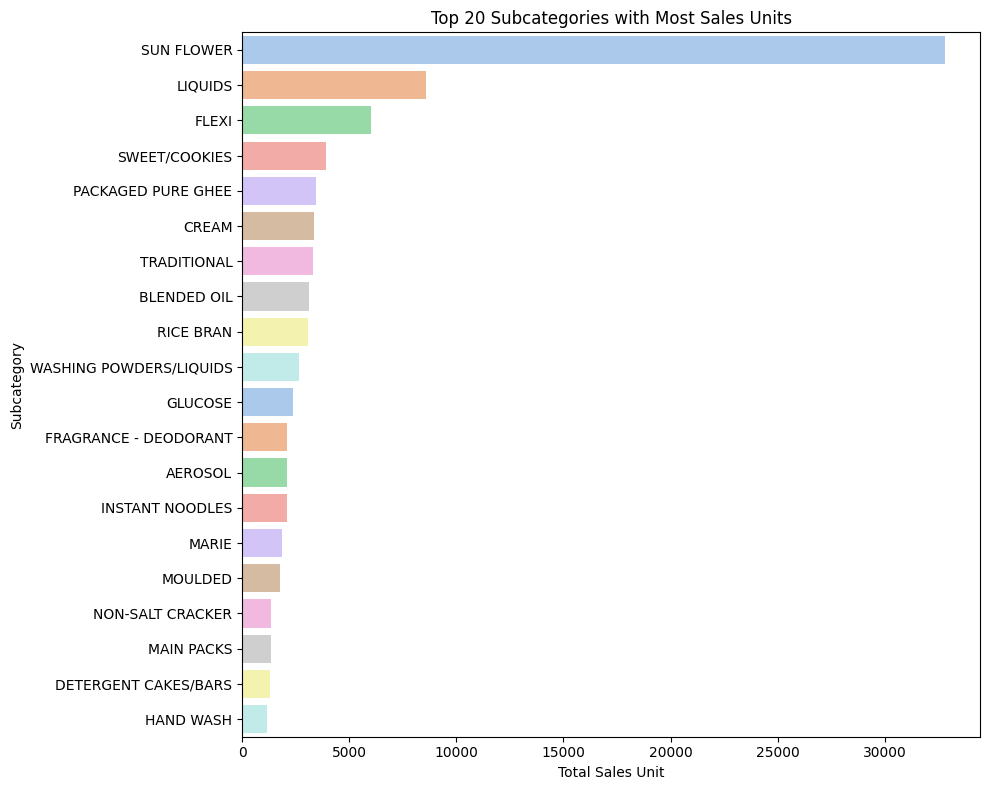

In [38]:
top_20_subcategories = total_sales_subcategory.nlargest(20, 'QTY')

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_subcategories, x='QTY', y='SGRP', palette='pastel')
plt.xlabel('Total Sales Unit')
plt.ylabel('Subcategory')
plt.title('Top 20 Subcategories with Most Sales Units')
plt.tight_layout()
plt.show()


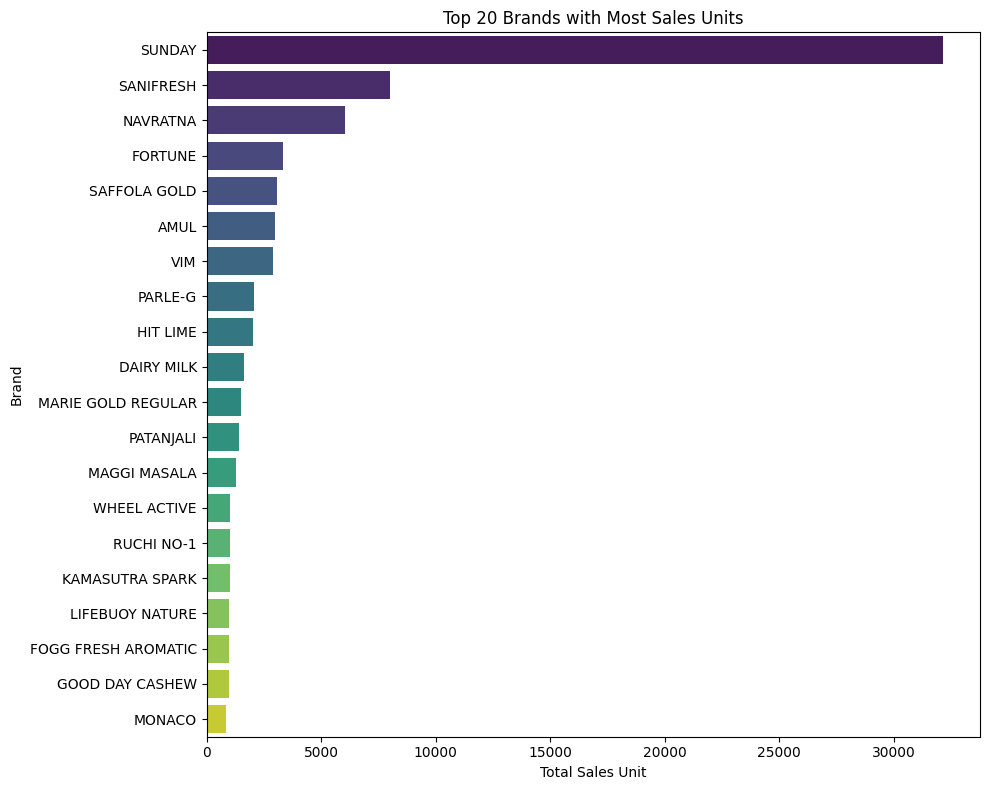

In [39]:
total_sales_brand = working_data.groupby('BRD')['QTY'].sum().reset_index()
top_20_brands = total_sales_brand.nlargest(20, 'QTY')

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_brands, x='QTY', y='BRD', palette='viridis')
plt.xlabel('Total Sales Unit')
plt.ylabel('Brand')
plt.title('Top 20 Brands with Most Sales Units')
plt.tight_layout()
plt.show()

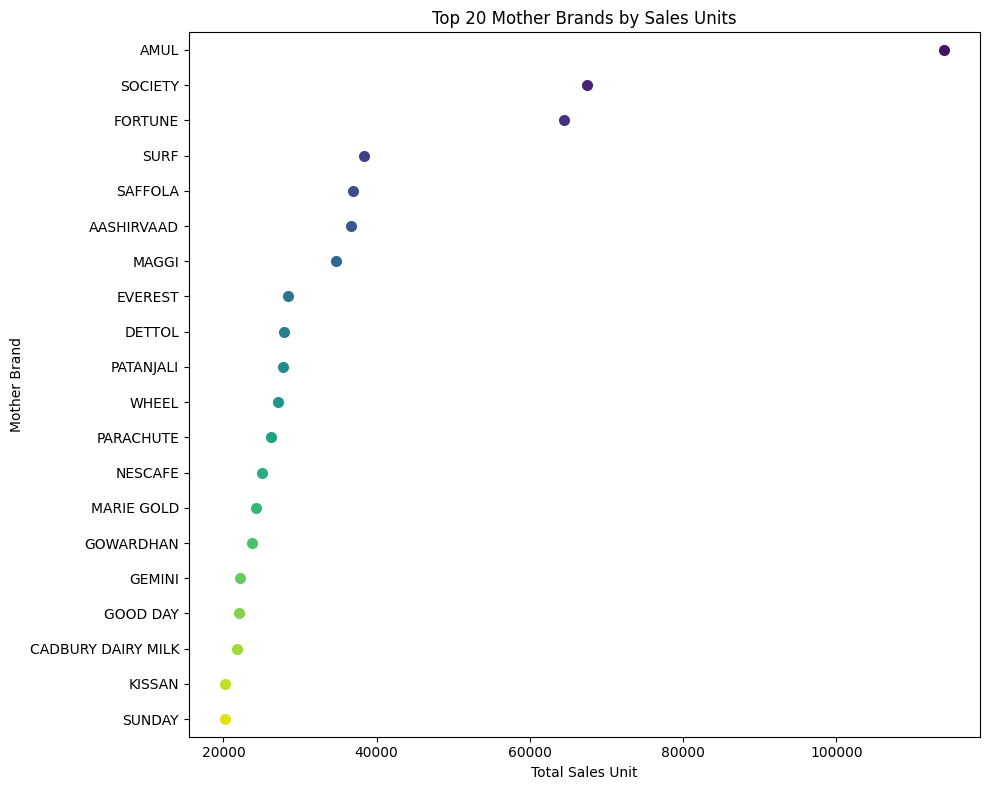

In [40]:
total_sales_Mother_Brand = working_data.groupby('MBRD')['VALUE'].sum().reset_index()
top_20_Mother_Brand = total_sales_Mother_Brand.nlargest(20, 'VALUE')

plt.figure(figsize=(10, 8))
sns.swarmplot(data=top_20_Mother_Brand, x='VALUE', y='MBRD', palette='viridis', size=8)
plt.xlabel('Total Sales Unit')
plt.ylabel('Mother Brand')
plt.title('Top 20 Mother Brands by Sales Units')
plt.tight_layout()
plt.show()

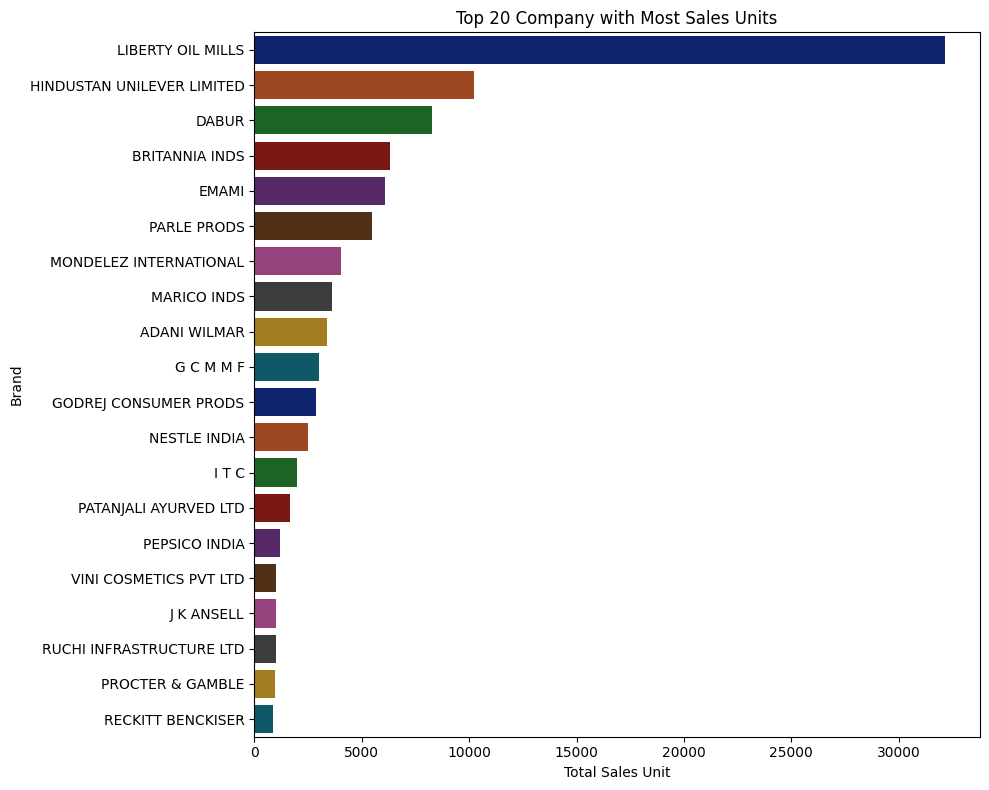

In [41]:
total_sales_Company = working_data.groupby('CMP')['QTY'].sum().reset_index()
top_20_Company = total_sales_Company.nlargest(20, 'QTY')

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_Company, x='QTY', y='CMP', palette='dark')
plt.xlabel('Total Sales Unit')
plt.ylabel('Brand')
plt.title('Top 20 Company with Most Sales Units')
plt.tight_layout()
plt.show()

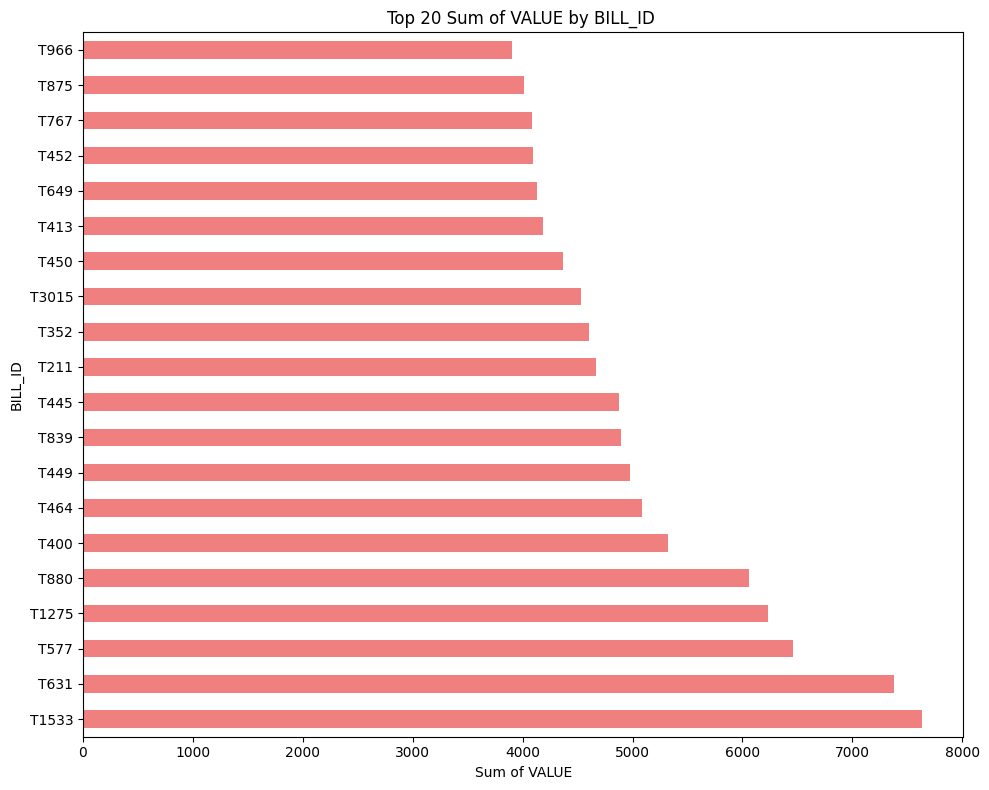

In [42]:
bill_id_sum_data = working_data[['BILL_ID', 'VALUE']]
bill_id_sum_values = bill_id_sum_data.groupby('BILL_ID')['VALUE'].sum()

top_20_values = bill_id_sum_values.nlargest(20)
plt.figure(figsize=(10, 8))
top_20_values.plot(kind='barh', color='lightcoral')
plt.title('Top 20 Sum of VALUE by BILL_ID ')
plt.xlabel('Sum of VALUE')
plt.ylabel('BILL_ID')
plt.tight_layout()
plt.show()